In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DSE.csv')

## Question:
### Which products should be dropped from selling in the next year moving forward and which products should be sold more?

To understand which products should be dropped from selling in the next year moving forward and which products should be sold more we can look at the profitability of each of the item type:

<AxesSubplot:xlabel='Item Type'>

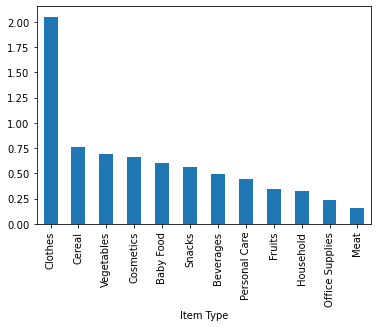

In [4]:
item_list =  df.groupby('Item Type')['Profit as % of Cost'].mean()
item_list.sort_values(ascending = False, inplace = True)
item_list.plot(kind = 'bar')

We can see that Clothes are the most profitable item types in the given data with profit margins considerably higher than the other item types like cereal, vegetables, etc.

On the other hand, Meat products have the least profit margin.


Let's look at the region-wise profitability of each of the item types to comment on which of the products should be focussed on and which products can be dropped due to low profitability.

In [5]:
item_region_list =  df.groupby(['Region','Item Type'])['Profit as % of Cost'].mean()
item_region_list.to_frame()
item_region_list.sort_values()

Region                             Item Type
Australia and Oceania              Meat         0.156846
North America                      Meat         0.156846
Central America and the Caribbean  Meat         0.156846
Middle East and North Africa       Meat         0.156846
Asia                               Meat         0.156846
                                                  ...   
Central America and the Caribbean  Clothes      2.049107
North America                      Clothes      2.049107
Sub-Saharan Africa                 Clothes      2.049107
Europe                             Clothes      2.049107
Australia and Oceania              Clothes      2.049107
Name: Profit as % of Cost, Length: 84, dtype: float64

As we can see the overall trend is continued in our region-wise analysis as well, with Meat products being the least profitable and Clothes being the most profitable across all regions.

This makes sense intuitively as well because clothes are not perishable items and thus the shipping and storage costs associated with clothes will be much less than the costs associated with the meat products.

#### Thus, looking at the data, we can say that clothes should be given preference while meat can be dropped from the item list for the next year.

## Question:

### Should any region be given preference over the other?

<AxesSubplot:xlabel='Region'>

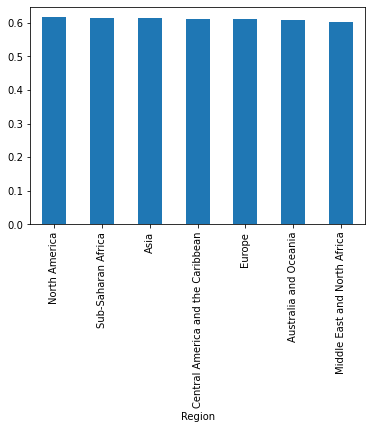

In [6]:
region_list =  df.groupby('Region')['Profit as % of Cost'].mean()
region_list.sort_values(ascending = False, inplace = True)
region_list.plot(kind = 'bar')

In [7]:
region_list

Region
North America                        0.616335
Sub-Saharan Africa                   0.613292
Asia                                 0.613162
Central America and the Caribbean    0.611853
Europe                               0.610915
Australia and Oceania                0.606901
Middle East and North Africa         0.602093
Name: Profit as % of Cost, dtype: float64

While the average profit percentage on items sold is similar across all the regions, we can look at the total profit in each of the regions to find out which regions are the major sources of profit for the companny.

<AxesSubplot:xlabel='Region'>

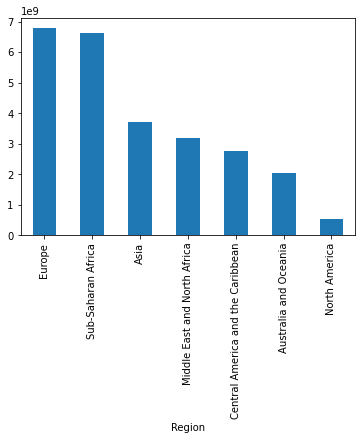

In [8]:
region_profit_list =  df.groupby('Region')['Total Profit'].sum()
region_profit_list.sort_values(ascending = False, inplace = True)
region_profit_list.plot(kind = 'bar')

We can see that Europe and Sub-Saharan Africa are the biggest sources of profit, whereas North America contributes least to the profits of the company.

To further analyze if there is a trend in profit distribution across the years, we can look at the profit percentages for every region across the 8 year period.

In [9]:
region_yearly_list =  df.groupby(['Region','Fiscal Year'])['Profit as % of Cost'].mean()
region_yearly_list

Region                             Fiscal Year
Asia                               2010           0.612257
                                   2011           0.623655
                                   2012           0.599875
                                   2013           0.626162
                                   2014           0.612539
                                   2015           0.607315
                                   2016           0.608798
                                   2017           0.616189
Australia and Oceania              2010           0.625979
                                   2011           0.595503
                                   2012           0.635246
                                   2013           0.586141
                                   2014           0.582620
                                   2015           0.616889
                                   2016           0.597974
                                   2017           0.621769
Central A

#### Looking at the profit percentages over the 8 year period, we can observe the following: 
#### 1. The profit percentage in Europe has seen a decline over the time period falling from 0.62% in 2010 to 0.60% in 2017.
#### 2. In the same time period, Sub-Saharan Africa has shown an increase in profit percentage from 0.59% in 2010 to 0.63% in 2017.
#### 3. All other regions have shown no significant increase or decrease in the profit percentage numbers.

#### Thus, looking at the total profit and profit as a % of cost numbers, the Sub-Saharan Africa region stands out as it has not only shown increase in profitability in the time period but is also one of the top regions by the amount of profit it generates. 
#### Hence, the Sub-Saharan Africa region should be given preference over the other regions.

## Question:

### Which products are the easiest to sell?

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Time_to_ship'] = df['Ship Date'] - df['Order Date']
df.sort_values(by = ['Time_to_ship'])

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,Time_to_ship
32067,Sub-Saharan Africa,Chad,Cereal,2012,Offline,H,2012-12-23,524854934,2012-12-23,5093,205.70,117.11,1047630.10,596441.23,451188.87,0.756468,0 days
18430,Sub-Saharan Africa,Guinea,Meat,2013,Offline,L,2013-05-22,300411117,2013-05-22,7180,421.89,364.69,3029170.20,2618474.20,410696.00,0.156846,0 days
47580,Asia,Sri Lanka,Cosmetics,2012,Offline,M,2012-09-22,793228185,2012-09-22,2702,437.20,263.33,1181314.40,711517.66,469796.74,0.660274,0 days
8635,Sub-Saharan Africa,Mozambique,Baby Food,2013,Offline,H,2013-06-18,587924182,2013-06-18,8685,255.28,159.42,2217106.80,1384562.70,832544.10,0.601305,0 days
18447,Europe,Malta,Beverages,2010,Offline,C,2010-11-06,604477488,2010-11-06,7177,47.45,31.79,340548.65,228156.83,112391.82,0.492608,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57210,Middle East and North Africa,Israel,Office Supplies,2013,Offline,L,2013-12-20,726482808,2014-02-08,1262,651.21,524.96,821827.02,662499.52,159327.50,0.240495,50 days
32931,Sub-Saharan Africa,Gabon,Beverages,2012,Online,M,2012-08-23,737139976,2012-10-12,4954,47.45,31.79,235067.30,157487.66,77579.64,0.492608,50 days
32928,Central America and the Caribbean,Jamaica,Cereal,2016,Offline,M,2016-12-24,189394700,2017-02-12,4955,205.70,117.11,1019243.50,580280.05,438963.45,0.756468,50 days
28287,Europe,Austria,Personal Care,2010,Offline,H,2010-07-24,584669911,2010-09-12,5674,81.73,56.67,463736.02,321545.58,142190.44,0.442209,50 days


Looking at the dataframe, we can see some of the products are shipped within the same day, whereas some products take as much as 50 days to ship. However, we cannot see any specific relationship between the type of product and the days it is taking to get shipped. 
Let us check if we can find any relationship between different regions and the time for products to get shipped according to the item type and region.

In [ ]:
df['Time_to_ship'] = df['Time_to_ship'].astype(str)
df["Time_to_ship"]= df["Time_to_ship"].str.split(" ", n = 1, expand = True)
df['Time_to_ship'] = df['Time_to_ship'].astype(int)

In [16]:
shipping_list =  df.groupby(by = ['Region','Item Type'])['Time_to_ship'].mean()

In [17]:
shipping_list.to_frame()
shipping_list.sort_values()

Region                             Item Type      
Australia and Oceania              Fruits             22.933180
North America                      Cereal             22.946903
Central America and the Caribbean  Cosmetics          23.968284
Australia and Oceania              Cosmetics          24.000000
Middle East and North Africa       Office Supplies    24.091822
                                                        ...    
Australia and Oceania              Vegetables         26.161731
Europe                             Office Supplies    26.169410
North America                      Personal Care      26.240602
                                   Baby Food          26.434426
                                   Meat               27.085271
Name: Time_to_ship, Length: 84, dtype: float64

Here too, we cannot see any specific relationship between the type of product, the regions and the days the item is taking to get shipped. 